In [3]:
# STEP 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [12]:
# STEP 2: Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tqdm import tqdm

In [13]:
# STEP 3: Load and preprocess images
IMG_SIZE = (128, 128)  # Resize for faster training
DATASET_PATH = "/content/drive/MyDrive/Images"

def change_background(image):
    # A simple transformation: Convert to grayscale and apply a color overlay (as background change)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    colored = cv2.merge([gray, gray, gray])
    return colored

X, y = [], []

# Class map
label_map = {'TC': 0, 'TS': 1}

for label_folder in ['TCImages', 'TSImages']:
    folder_path = os.path.join(DATASET_PATH, label_folder)
    for img_file in tqdm(os.listdir(folder_path)):
        if img_file.endswith('.png'):
            img_path = os.path.join(folder_path, img_file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, IMG_SIZE)
            #image = change_background(image)  # Apply background transformation
            X.append(image)

            label = img_file[:2]  # TS or TC
            y.append(label_map[label])

X = np.array(X) / 255.0
y = to_categorical(np.array(y), num_classes=2)

100%|██████████| 219/219 [00:02<00:00, 99.55it/s] 


In [14]:
# STEP 4: Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# STEP 5: Define simple CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,986 (14.14 MB)

 Trainable params: 3,705,986 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# STEP 6: Train model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16)

Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 221ms/step - accuracy: 0.6818 - loss: 0.6295 - val_accuracy: 0.7636 - val_loss: 0.5179
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.7609 - loss: 0.4883 - val_accuracy: 0.7364 - val_loss: 0.5549
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.7955 - loss: 0.4220 - val_accuracy: 0.7727 - val_loss: 0.4667
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.8724 - loss: 0.3144 - val_accuracy: 0.8182 - val_loss: 0.3946
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 211ms/step - accuracy: 0.9401 - loss: 0.1966 - val_accuracy: 0.7909 - val_loss: 0.4389
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 214ms/step - accuracy: 0.9579 - loss: 0.1424 - val_accuracy: 0.7636 - val_loss: 0.5930
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 10s 213ms/step - accuracy: 0.9836 - loss: 0.0802 - val_accuracy: 0.7636 - val_loss: 0.6669
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 228ms/step - accuracy: 0.9913 - loss: 0.0623 - val_accurac

In [17]:
# STEP 7: Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.7471 - loss: 0.7886
Test Accuracy: 74.55%


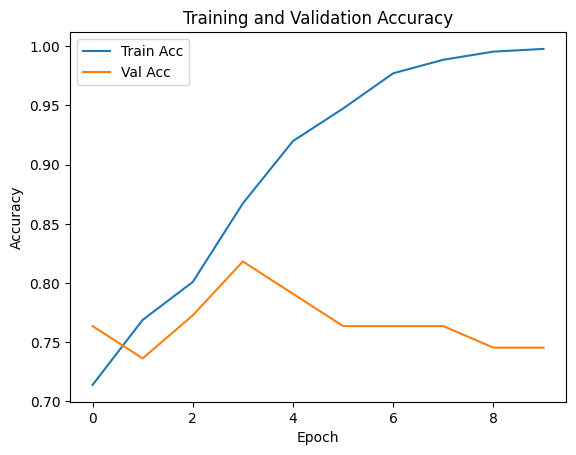

In [18]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()